# Packing results with correlation

## Import libraries

In [ ]:
import os
from pathlib import Path
os.chdir(str(Path(os.getcwd()).parent))
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Define global plotting constants

In [1]:
SMALL_SIZE = 30
BIGGER_SIZE = 30
AXES_SIZE = 20
LEGEND_SIZE = 15
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=AXES_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=AXES_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=AXES_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=LEGEND_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set_style("whitegrid")
plt.rcParams["axes.facecolor"] = "white"

/tmp/ipykernel_2129009/2712178856.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Construct table

In [2]:
methods = [
    "AF_FULL",
    "ATTNPACK",
    "ATTNPACK_AF",
    "BB",
    "BB_AF",
    "BB_PSF",
    "CB_DUMMY",
    "CB_HEURISTIC",
    "FASPR",
    "FASPR_AF",
    "PSF_AF",
    "BB_CB",
    "TEMPLATE_AF",
]
output = []
for dataset in ["CASP13", "CASP14", "CAMEO1"]:
    dataset_path = Path(dataset)
    for template_path in dataset_path.glob("*.fasta"):
        template = template_path.stem
        for method in methods:
            scores_path = Path(f"{dataset_path}_{method}/{template}/scores.pkl")
            if scores_path.exists():
                with open(scores_path, "rb") as save_file:
                    print(f"read path: {dataset_path}_{method}/{template}/scores.pkl")
                    curr_output = pickle.load(save_file)
                output.append(curr_output)
df = pd.DataFrame(output)
df

read path: CASP13_AF_FULL/T0969/scores.pkl
read path: CASP13_ATTNPACK/T0969/scores.pkl
read path: CASP13_ATTNPACK_AF/T0969/scores.pkl
read path: CASP13_BB/T0969/scores.pkl
read path: CASP13_BB_PSF/T0969/scores.pkl
read path: CASP13_CB_DUMMY/T0969/scores.pkl
read path: CASP13_CB_HEURISTIC/T0969/scores.pkl
read path: CASP13_FASPR/T0969/scores.pkl
read path: CASP13_FASPR_AF/T0969/scores.pkl
read path: CASP13_PSF_AF/T0969/scores.pkl
read path: CASP13_BB_CB/T0969/scores.pkl
read path: CASP13_TEMPLATE_AF/T0969/scores.pkl
read path: CASP13_AF_FULL/T1014/scores.pkl
read path: CASP13_ATTNPACK/T1014/scores.pkl
read path: CASP13_ATTNPACK_AF/T1014/scores.pkl
read path: CASP13_BB/T1014/scores.pkl
read path: CASP13_BB_PSF/T1014/scores.pkl
read path: CASP13_CB_DUMMY/T1014/scores.pkl
read path: CASP13_CB_HEURISTIC/T1014/scores.pkl
read path: CASP13_FASPR/T1014/scores.pkl
read path: CASP13_FASPR_AF/T1014/scores.pkl
read path: CASP13_PSF_AF/T1014/scores.pkl
read path: CASP13_BB_CB/T1014/scores.pkl
read 

,method,dataset,template,rmsd,rmsd_central,rmsd_surface,lddt,ost_rmsd,tm_score,af_pLDDT_mean,...,att_mae4_mean,att_mae4_x_sasa,local_lddt_mean,local_lddt_x_sasa,att_rmsd_x_pLDDT,att_mae1_x_pLDDT,att_mae2_x_pLDDT,att_mae3_x_pLDDT,att_mae4_x_pLDDT,local_lddt_x_pLDDT
0,AF_FULL,CASP13,T0969,tensor(0.6657),tensor(0.3897),tensor(0.9379),0.886784,0.853674,0.985882,93.909463,...,0.887363,0.286470,0.877605,-0.436322,-0.199049,-0.187987,-0.274420,-0.122675,-0.411580,0.597607
1,ATTNPACK,CASP13,T0969,tensor(0.4175),tensor(0.2984),tensor(0.5486),0.968448,0.000002,1.000000,95.010593,...,0.894411,0.265607,0.968401,-0.296555,-0.571902,-0.440258,-0.465977,-0.451794,-0.399883,0.529830
2,ATTNPACK_AF,CASP13,T0969,tensor(0.4929),tensor(0.3282),tensor(0.6644),0.961140,0.192980,0.999206,97.963475,...,0.915560,0.278944,0.960630,-0.339867,-0.186836,-0.183652,-0.370422,-0.086370,-0.317111,0.255126
3,BB,CASP13,T0969,tensor(1.3984),tensor(1.4777),tensor(1.4392),0.237550,24.411104,0.332556,38.191893,...,1.009008,0.169773,0.265949,0.315805,-0.122554,-0.143383,-0.067477,-0.115703,0.034226,0.749233
4,BB_PSF,CASP13,T0969,tensor(2.0043),tensor(1.9445),tensor(2.0564),0.763779,0.000002,1.000000,0.000000,...,0.990235,0.164720,0.779562,0.011087,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,FASPR,CAMEO1,8VWXA,tensor(0.6793),tensor(0.3591),tensor(0.9210),0.942099,0.000006,1.000000,0.000000,...,0.808703,-0.160588,0.942440,-0.334268,NaN,NaN,NaN,NaN,NaN,NaN
2305,FASPR_AF,CAMEO1,8VWXA,tensor(0.5928),tensor(0.2787),tensor(0.8578),0.924372,1.570624,0.986665,91.910677,...,0.744590,-0.216036,0.921082,-0.282997,-0.159292,-0.161080,-0.044654,-0.004403,-0.264205,0.826321
2306,PSF_AF,CAMEO1,8VWXA,tensor(0.6866),tensor(0.3419),tensor(0.9013),0.906702,1.698290,0.985414,90.308546,...,0.732104,-0.213844,0.905392,-0.255791,-0.213750,-0.230681,-0.116648,0.179053,-0.281519,0.811754
2307,BB_CB,CAMEO1,8VWXA,tensor(0.6538),tensor(0.3735),tensor(0.9565),0.903701,1.586273,0.984173,89.076653,...,0.702349,-0.173648,0.901498,-0.291491,-0.219609,-0.257065,-0.075437,0.102220,-0.265298,0.801557


## Table variables

In [3]:
# Might need to be adapted for correct names
method_dict = {
    "BB_CB": "Template C-$\\beta$",
    "AF_FULL": "MSA",
    "ATTNPACK": "AttnPacker",
    "ATTNPACK_AF": "AttnPacker (AF2)",
    "BB": "Backbone",
    "BB_PSF": "C36",
    "CB_DUMMY": "Dummy",
    "CB_HEURISTIC": "Heuristic C-$\\beta$",
    "FASPR": "FASPR",
    "FASPR_AF": "FASPR (AF2)",
    "PSF_AF": "C36 (AF2)",
    "TEMPLATE_AF": "Template",
}
columns = [
    "TM-score $\\uparrow$",
    "lDDT $\\uparrow$",
    "RMSD (\\AA) $\\downarrow$",
    "MAE 1 (rad) $\\downarrow$",
    "MAE 2 (rad) $\\downarrow$",
    "MAE 3 (rad) $\\downarrow$",
    "MAE 4 (rad) $\\downarrow$",
]
measure_dict = {
    "lddt": "lDDT $\\uparrow$",
    "tm_score": "TM-score $\\uparrow$",
    "af_pLDDT_mean": "pLDDT $\\uparrow$",
    "att_rmsd_mean": "RMSD (\\AA) $\\downarrow$",
    "att_mae1_mean": "MAE 1 (rad) $\\downarrow$",
    "att_mae2_mean": "MAE 2 (rad) $\\downarrow$",
    "att_mae3_mean": "MAE 3 (rad) $\\downarrow$",
    "att_mae4_mean": "MAE 4 (rad) $\\downarrow$",
    "method": "Method",
    "dataset": "Dataset",
}

## Check if all setups are here

In [4]:
df["method"] = df["method"].replace(method_dict)
df.groupby(["method", "dataset"])["template"].agg("count")

method               dataset
AttnPacker           CAMEO1     53
                     CASP13     77
                     CASP14     62
AttnPacker (AF2)     CAMEO1     53
                     CASP13     77
                     CASP14     62
Backbone             CAMEO1     53
                     CASP13     77
                     CASP14     62
C36                  CAMEO1     53
                     CASP13     78
                     CASP14     62
C36 (AF2)            CAMEO1     53
                     CASP13     78
                     CASP14     62
Dummy                CAMEO1     53
                     CASP13     77
                     CASP14     62
FASPR                CAMEO1     53
                     CASP13     78
                     CASP14     62
FASPR (AF2)          CAMEO1     53
                     CASP13     78
                     CASP14     62
Heuristic C-$\beta$  CAMEO1     53
                     CASP13     78
                     CASP14     62
MSA                  CAMEO

## Marshall table

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
grouped = (
    df.rename(measure_dict, axis=1)
    .replace("Method", method_dict)
    .groupby(["Method", "Dataset"])[columns]
    .agg(lambda x: x.abs().mean())
)
grouped_std = (
    df.rename(measure_dict, axis=1)
    .replace("Method", method_dict)
    .groupby(["Method", "Dataset"])[columns]
    .agg(lambda x: x.abs().std())
)
for column in columns:
    grouped_std[f"{column}"] = (
        grouped[column].apply(lambda x: f"{x:.3f}")
        + " $\\pm$ "
        + grouped_std[column].apply(lambda x: f"{x:.3f}")
    )
grouped_std

TM-score $\uparrow$    lDDT $\uparrow$  \
Method              Dataset                                          
AttnPacker          CAMEO1    1.000 $\pm$ 0.000  0.945 $\pm$ 0.030   
                    CASP13    1.000 $\pm$ 0.000  0.953 $\pm$ 0.025   
                    CASP14    1.000 $\pm$ 0.000  0.937 $\pm$ 0.026   
AttnPacker (AF2)    CAMEO1    0.962 $\pm$ 0.128  0.921 $\pm$ 0.067   
                    CASP13    0.986 $\pm$ 0.031  0.932 $\pm$ 0.039   
                    CASP14    0.983 $\pm$ 0.030  0.910 $\pm$ 0.045   
Backbone            CAMEO1    0.462 $\pm$ 0.227  0.430 $\pm$ 0.191   
                    CASP13    0.411 $\pm$ 0.205  0.393 $\pm$ 0.168   
                    CASP14    0.409 $\pm$ 0.200  0.392 $\pm$ 0.178   
C36                 CAMEO1    1.000 $\pm$ 0.000  0.783 $\pm$ 0.020   
                    CASP13    1.000 $\pm$ 0.000  0.782 $\pm$ 0.017   
                    CASP14    1.000 $\pm$ 0.000  0.786 $\pm$ 0.018   
C36 (AF2)           CAMEO1    0.957 $\pm$ 0.131  0.898 $\pm$ 0.068   
                    CASP13    0.962 $\pm$ 0.111  0.890 $\pm$ 0.099   
                    CASP14    0.978 $\pm$ 0.036  0.888 $\pm$ 0.045   
Dummy               CAMEO1    0.346 $\pm$ 0.218  0.324 $\pm$ 0.198   
                    CASP13    0.325 $\pm$ 0.200  0.306 $\pm$ 0.174   
                    CASP14    0.318 $\pm$ 0.210  0.311 $\pm$ 0.189   
FASPR               CAMEO1    1.000 $\pm$ 0.000  0.923 $\pm$ 0.031   
                    CASP13    1.000 $\pm$ 0.000  0.926 $\pm$ 0.027   
                    CASP14    1.000 $\pm$ 0.000  0.911 $\pm$ 0.030   
FASPR (AF2)         CAMEO1    0.963 $\pm$ 0.124  0.915 $\pm$ 0.061   
                    CASP13    0.983 $\pm$ 0.049  0.924 $\pm$ 0.037   
                    CASP14    0.983 $\pm$ 0.030  0.905 $\pm$ 0.043   
Heuristic C-$\beta$ CAMEO1    0.958 $\pm$ 0.132  0.898 $\pm$ 0.059   
                    CASP13    0.979 $\pm$ 0.061  0.901 $\pm$ 0.038   
                    CASP14    0.979 $\pm$ 0.034  0.883 $\pm$ 0.046   
MSA                 CAMEO1    0.892 $\pm$ 0.166  0.831 $\pm$ 0.110   
                    CASP13    0.831 $\pm$ 0.196  0.811 $\pm$ 0.113   
                    CASP14    0.793 $\pm$ 0.178  0.743 $\pm$ 0.146   
Template            CAMEO1    0.961 $\pm$ 0.132  0.934 $\pm$ 0.070   
                    CASP13    0.985 $\pm$ 0.032  0.945 $\pm$ 0.038   
                    CASP14    0.982 $\pm$ 0.031  0.926 $\pm$ 0.045   
Template C-$\beta$  CAMEO1    0.951 $\pm$ 0.134  0.894 $\pm$ 0.070   
                    CASP13    0.974 $\pm$ 0.062  0.905 $\pm$ 0.041   
                    CASP14    0.971 $\pm$ 0.038  0.883 $\pm$ 0.052   

                            RMSD (\AA) $\downarrow$ MAE 1 (rad) $\downarrow$  \
Method              Dataset                                                    
AttnPacker          CAMEO1        0.600 $\pm$ 0.244        0.335 $\pm$ 0.174   
                    CASP13        0.532 $\pm$ 0.202        0.302 $\pm$ 0.150   
                    CASP14        0.687 $\pm$ 0.220        0.414 $\pm$ 0.176   
AttnPacker (AF2)    CAMEO1        0.660 $\pm$ 0.285        0.364 $\pm$ 0.213   
                    CASP13        0.616 $\pm$ 0.220        0.356 $\pm$ 0.175   
                    CASP14        0.772 $\pm$ 0.263        0.461 $\pm$ 0.203   
Backbone            CAMEO1        1.090 $\pm$ 0.201        0.708 $\pm$ 0.143   
                    CASP13        1.107 $\pm$ 0.171        0.740 $\pm$ 0.140   
                    CASP14        1.183 $\pm$ 0.198        0.784 $\pm$ 0.143   
C36                 CAMEO1        1.770 $\pm$ 0.192        1.357 $\pm$ 0.100   
                    CASP13        1.731 $\pm$ 0.149        1.339 $\pm$ 0.086   
                    CASP14        1.769 $\pm$ 0.154        1.315 $\pm$ 0.096   
C36 (AF2)           CAMEO1        0.774 $\pm$ 0.262        0.461 $\pm$ 0.198   
                    CASP13        0.778 $\pm$ 0.215        0.485 $\pm$ 0.177   
                    CASP14        0.883 $\pm$ 0.249        0.552 $\pm$ 0.188   
Dummy  

## To LaTeX

In [6]:
selected_rows = [
    "MSA",
    "Dummy",
    "Backbone",
    "Template",
    "Template C-$\\beta$",
    "Heuristic C-$\\beta$",
    "AttnPacker",
    "AttnPacker (AF2)",
    "C36",
    "C36 (AF2)",
    "FASPR",
    "FASPR (AF2)",
]
grouped_std.loc[selected_rows].to_latex(
    float_format="%.3f", escape=False, bold_rows=True
)

'\\begin{tabular}{lllllllll}\n\\toprule\n &  & TM-score $\\uparrow$ & lDDT $\\uparrow$ & RMSD (\\AA) $\\downarrow$ & MAE 1 (rad) $\\downarrow$ & MAE 2 (rad) $\\downarrow$ & MAE 3 (rad) $\\downarrow$ & MAE 4 (rad) $\\downarrow$ \\\\\nMethod & Dataset &  &  &  &  &  &  &  \\\\\n\\midrule\n\\multirow[t]{3}{*}{\\textbf{MSA}} & \\textbf{CAMEO1} & 0.892 $\\pm$ 0.166 & 0.831 $\\pm$ 0.110 & 0.784 $\\pm$ 0.276 & 0.479 $\\pm$ 0.199 & 0.490 $\\pm$ 0.145 & 0.805 $\\pm$ 0.170 & 0.956 $\\pm$ 0.223 \\\\\n\\textbf{} & \\textbf{CASP13} & 0.831 $\\pm$ 0.196 & 0.811 $\\pm$ 0.113 & 0.799 $\\pm$ 0.225 & 0.517 $\\pm$ 0.188 & 0.500 $\\pm$ 0.130 & 0.817 $\\pm$ 0.163 & 0.947 $\\pm$ 0.234 \\\\\n\\textbf{} & \\textbf{CASP14} & 0.793 $\\pm$ 0.178 & 0.743 $\\pm$ 0.146 & 0.973 $\\pm$ 0.254 & 0.632 $\\pm$ 0.191 & 0.573 $\\pm$ 0.149 & 0.882 $\\pm$ 0.158 & 0.877 $\\pm$ 0.229 \\\\\n\\cline{1-9}\n\\multirow[t]{3}{*}{\\textbf{Dummy}} & \\textbf{CAMEO1} & 0.346 $\\pm$ 0.218 & 0.324 $\\pm$ 0.198 & 1.156 $\\pm$ 0.194 & 0.76

## Violin plots

In [7]:
columns = ["TM-score", "lDDT", "RMSD", "MAE 1", "MAE 2", "MAE 3", "MAE 4"]
measure_dict = {
    "lddt": "lDDT",
    "tm_score": "TM-score",
    "af_pLDDT_mean": "pLDDT %",
    "att_rmsd_mean": "RMSD ($\\AA$)",
    "att_mae1_mean": "MAE 1 (rad)",
    "att_mae2_mean": "MAE 2 (rad)",
    "att_mae3_mean": "MAE 3 (rad)",
    "att_mae4_mean": "MAE 4 (rad)",
    "method": "Method",
    "dataset": "Dataset",
}
order = [
    "MSA",
    "Template",
    "Backbone",
    "Heuristic C-$\\beta$",
    "Template C-$\\beta$",
    "AttnPacker",
    "AttnPacker (AF2)",
]
metrics = [
    "lDDT",
    "TM-score",
    "pLDDT %",
    "RMSD ($\\AA$)",
    "MAE 1 (rad)",
    "MAE 2 (rad)",
    "MAE 3 (rad)",
    "MAE 4 (rad)",
]
grp = df.rename(measure_dict, axis=1).replace("Method", method_dict)
grp.head()

,Method,Dataset,template,rmsd,rmsd_central,rmsd_surface,lDDT,ost_rmsd,TM-score,pLDDT %,af_pLDDT_x_sasa,RMSD ($\AA$),att_rmsd_x_sasa,MAE 1 (rad),att_mae1_x_sasa,MAE 2 (rad),att_mae2_x_sasa,MAE 3 (rad),att_mae3_x_sasa,MAE 4 (rad),att_mae4_x_sasa,local_lddt_mean,local_lddt_x_sasa,att_rmsd_x_pLDDT,att_mae1_x_pLDDT,att_mae2_x_pLDDT,att_mae3_x_pLDDT,att_mae4_x_pLDDT,local_lddt_x_pLDDT
0,MSA,CASP13,T0969,tensor(0.6657),tensor(0.3897),tensor(0.9379),0.886784,0.853674,0.985882,93.909463,-0.487551,0.639371,0.326691,0.311609,0.257903,0.357786,0.306153,0.706499,0.072877,0.887363,0.286470,0.877605,-0.436322,-0.199049,-0.187987,-0.274420,-0.122675,-0.411580,0.597607
1,AttnPacker,CASP13,T0969,tensor(0.4175),tensor(0.2984),tensor(0.5486),0.968448,0.000002,1.000000,95.010593,-0.475299,0.401017,0.305336,0.162483,0.219658,0.273718,0.357659,0.643237,0.219879,0.894411,0.265607,0.968401,-0.296555,-0.571902,-0.440258,-0.465977,-0.451794,-0.399883,0.529830
2,AttnPacker (AF2),CASP13,T0969,tensor(0.4929),tensor(0.3282),tensor(0.6644),0.961140,0.192980,0.999206,97.963475,-0.505655,0.473445,0.311217,0.192329,0.206278,0.277481,0.357889,0.515649,0.220336,0.915560,0.278944,0.960630,-0.339867,-0.186836,-0.183652,-0.370422,-0.086370,-0.317111,0.255126
3,Backbone,CASP13,T0969,tensor(1.3984),tensor(1.4777),tensor(1.4392),0.237550,24.411104,0.332556,38.191893,0.042222,1.343055,0.041098,0.794124,-0.010325,0.602724,0.158952,0.923342,-0.053530,1.009008,0.169773,0.265949,0.315805,-0.122554,-0.143383,-0.067477,-0.115703,0.034226,0.749233
4,C36,CASP13,T0969,tensor(2.0043),tensor(1.9445),tensor(2.0564),0.763779,0.000002,1.000000,0.000000,NaN,1.925064,0.056614,1.304803,0.070383,0.815523,0.021470,1.107278,-0.163862,0.990235,0.164720,0.779562,0.011087,NaN,NaN,NaN,NaN,NaN,NaN


## Plot violin plots

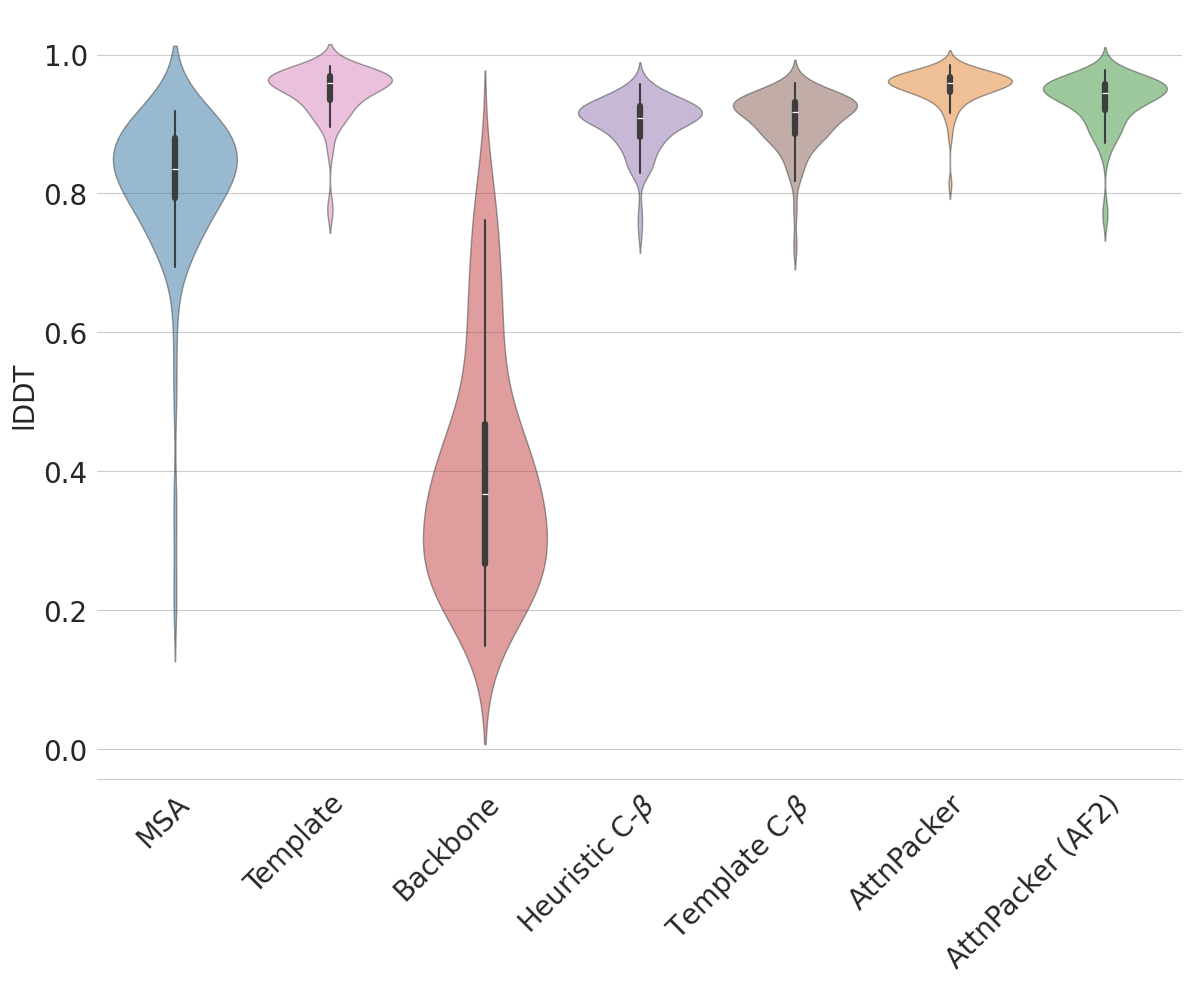

<Figure size 640x480 with 0 Axes>

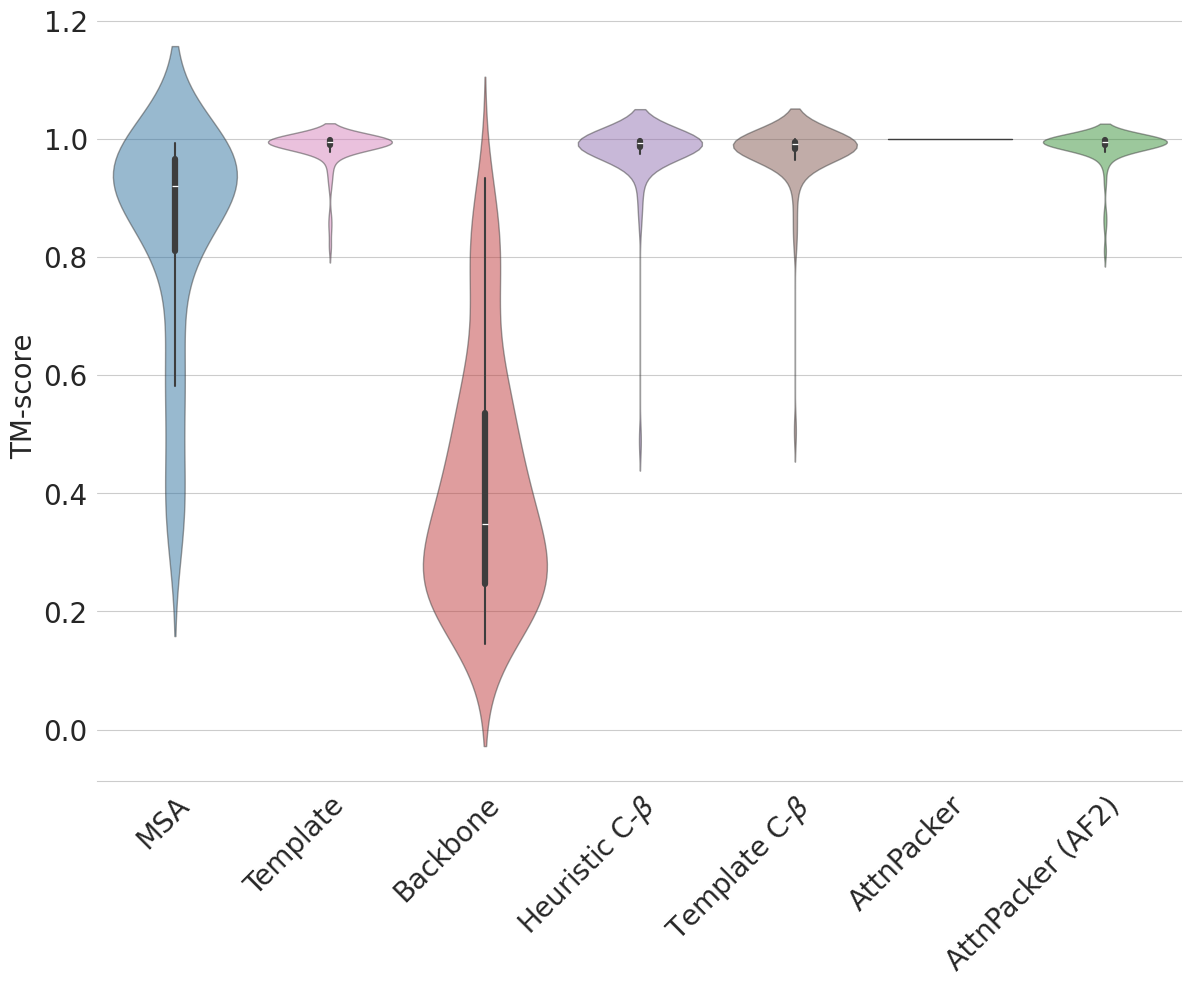

<Figure size 640x480 with 0 Axes>

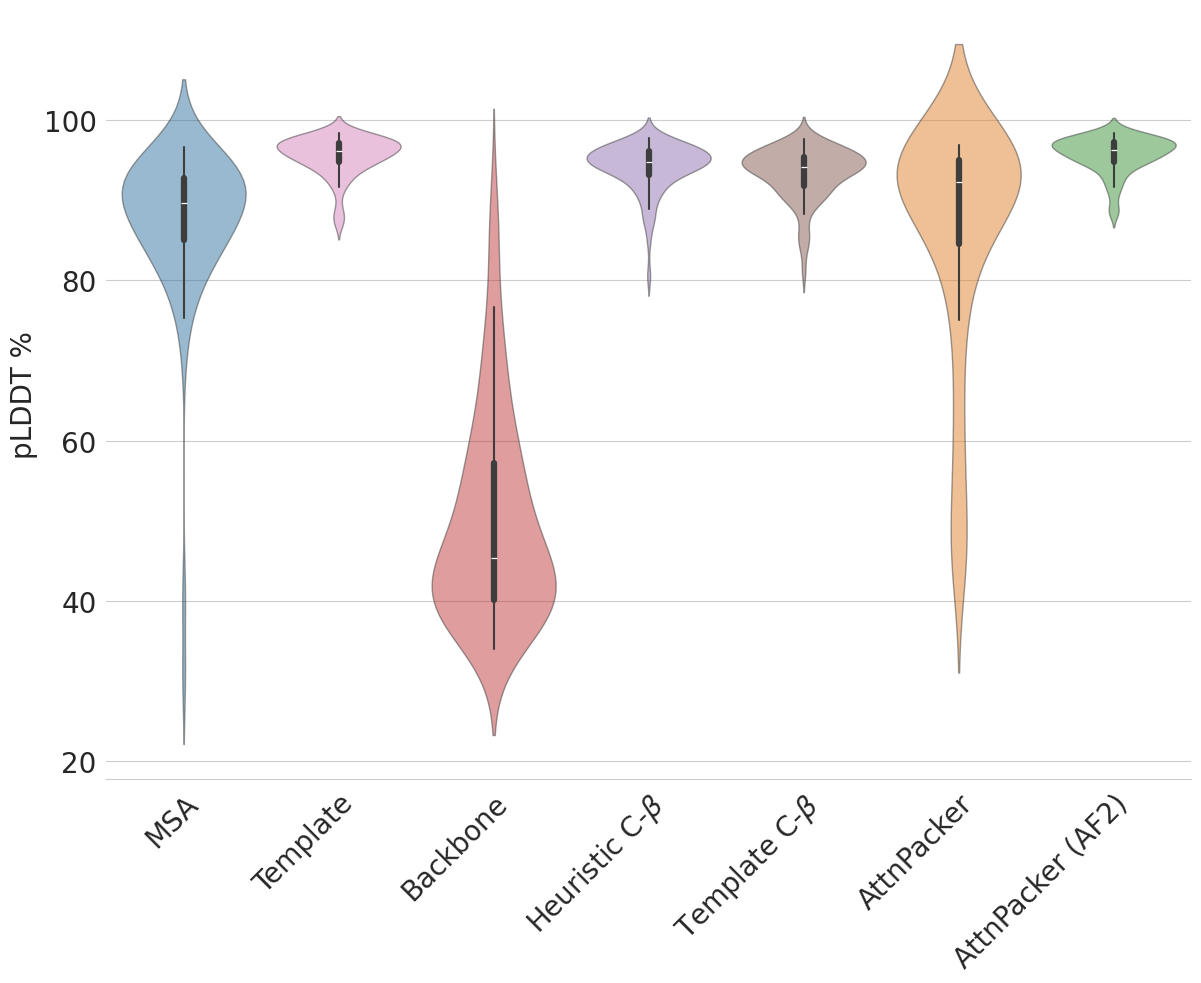

<Figure size 640x480 with 0 Axes>

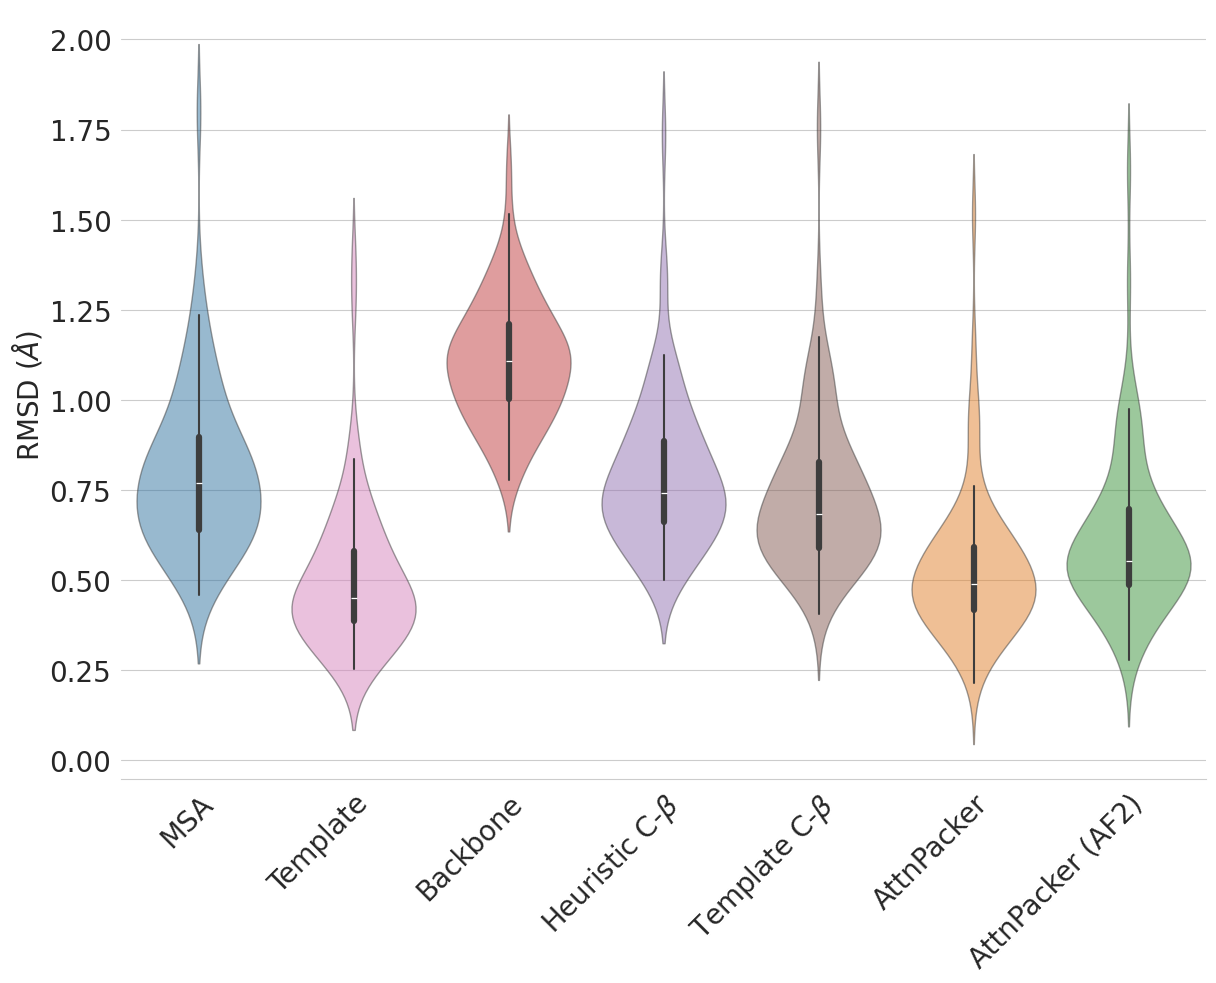

<Figure size 640x480 with 0 Axes>

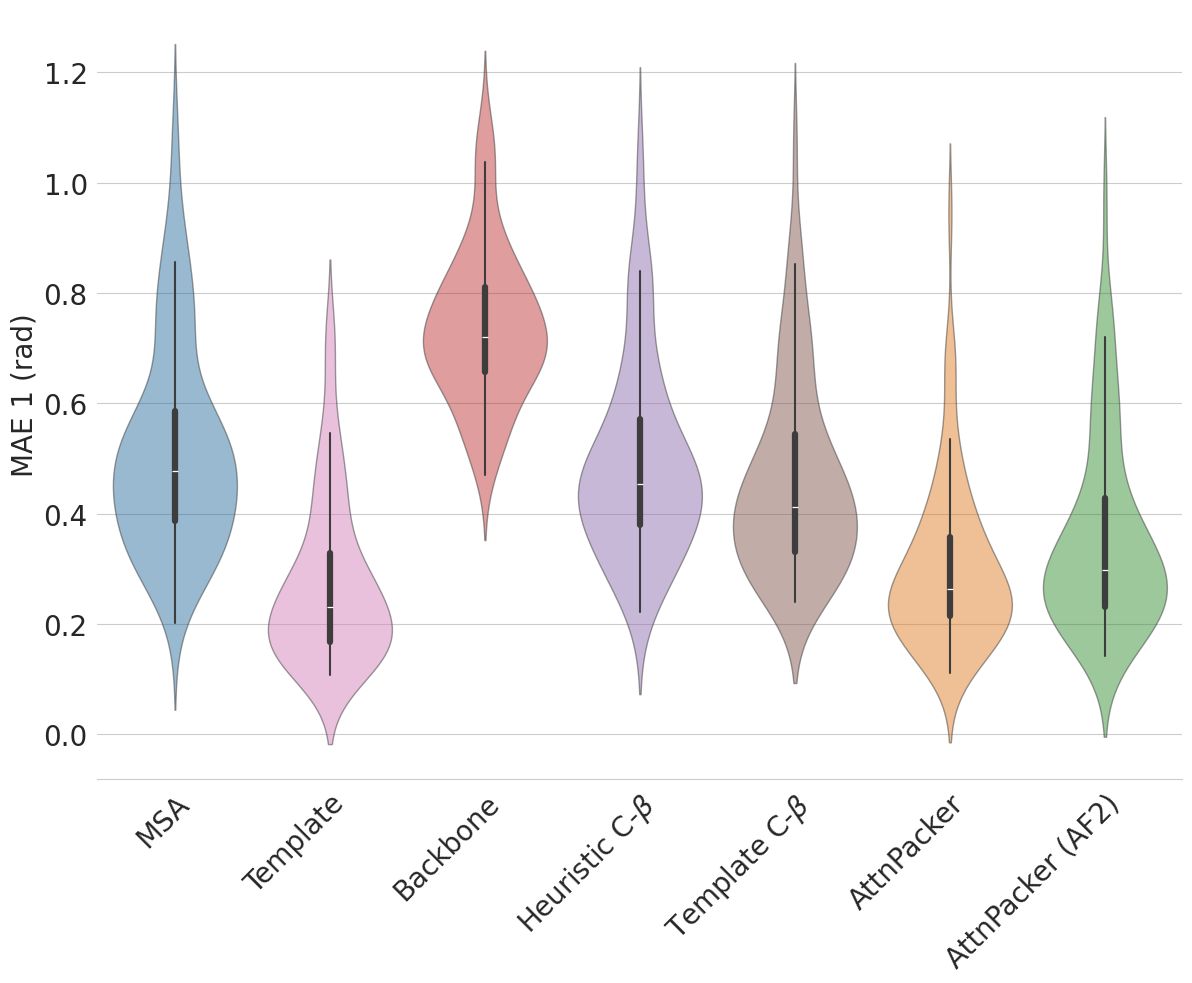

<Figure size 640x480 with 0 Axes>

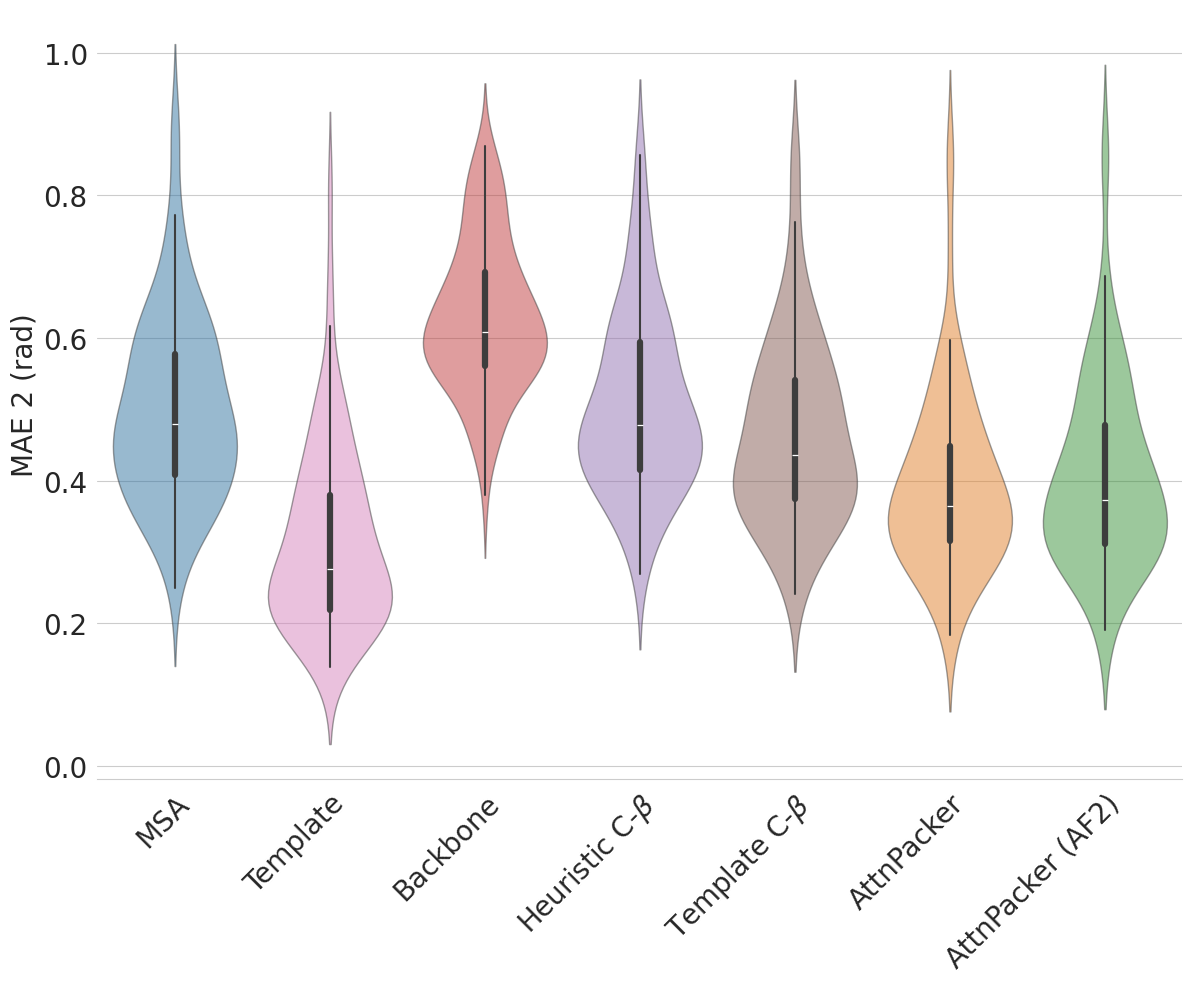

<Figure size 640x480 with 0 Axes>

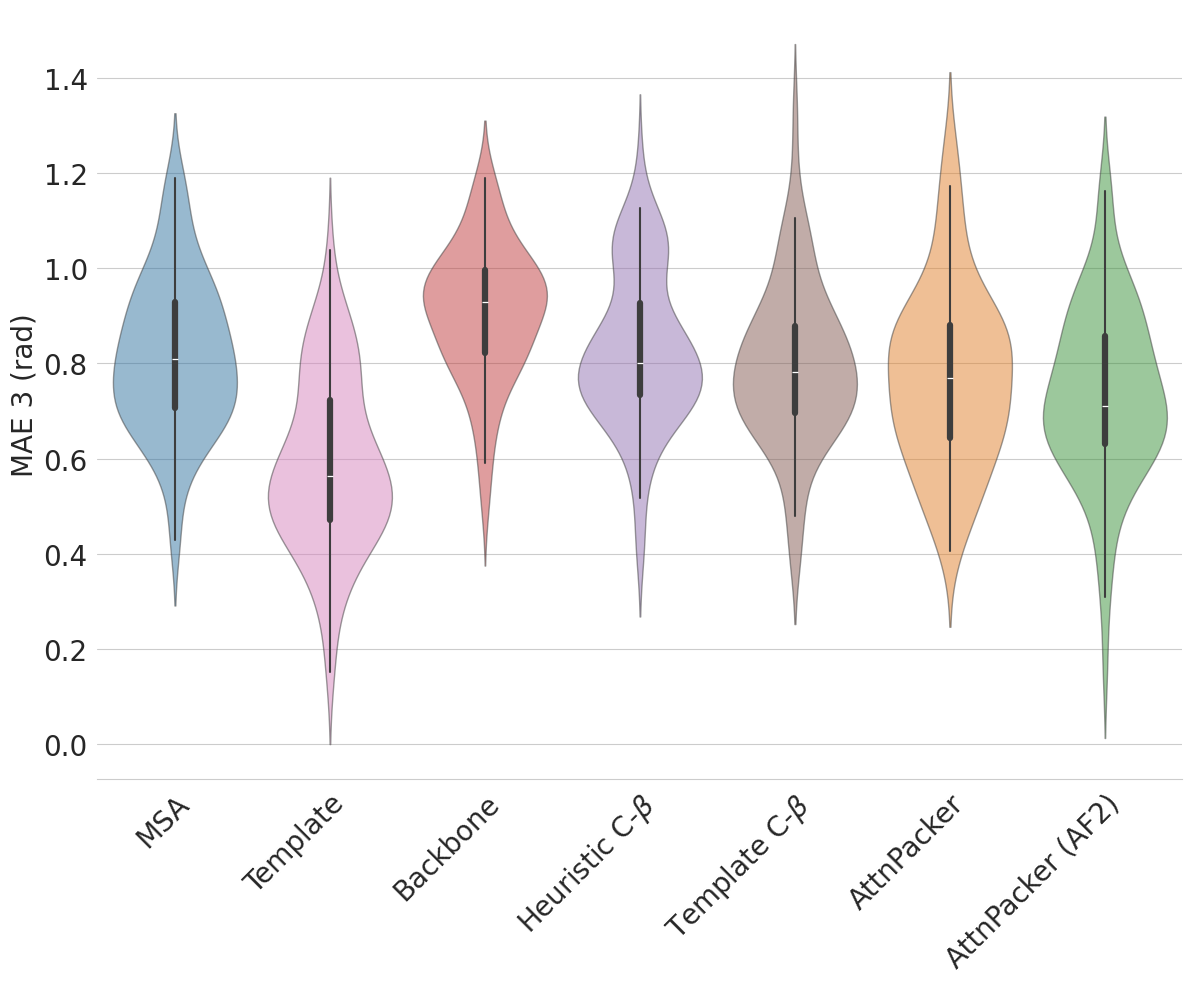

<Figure size 640x480 with 0 Axes>

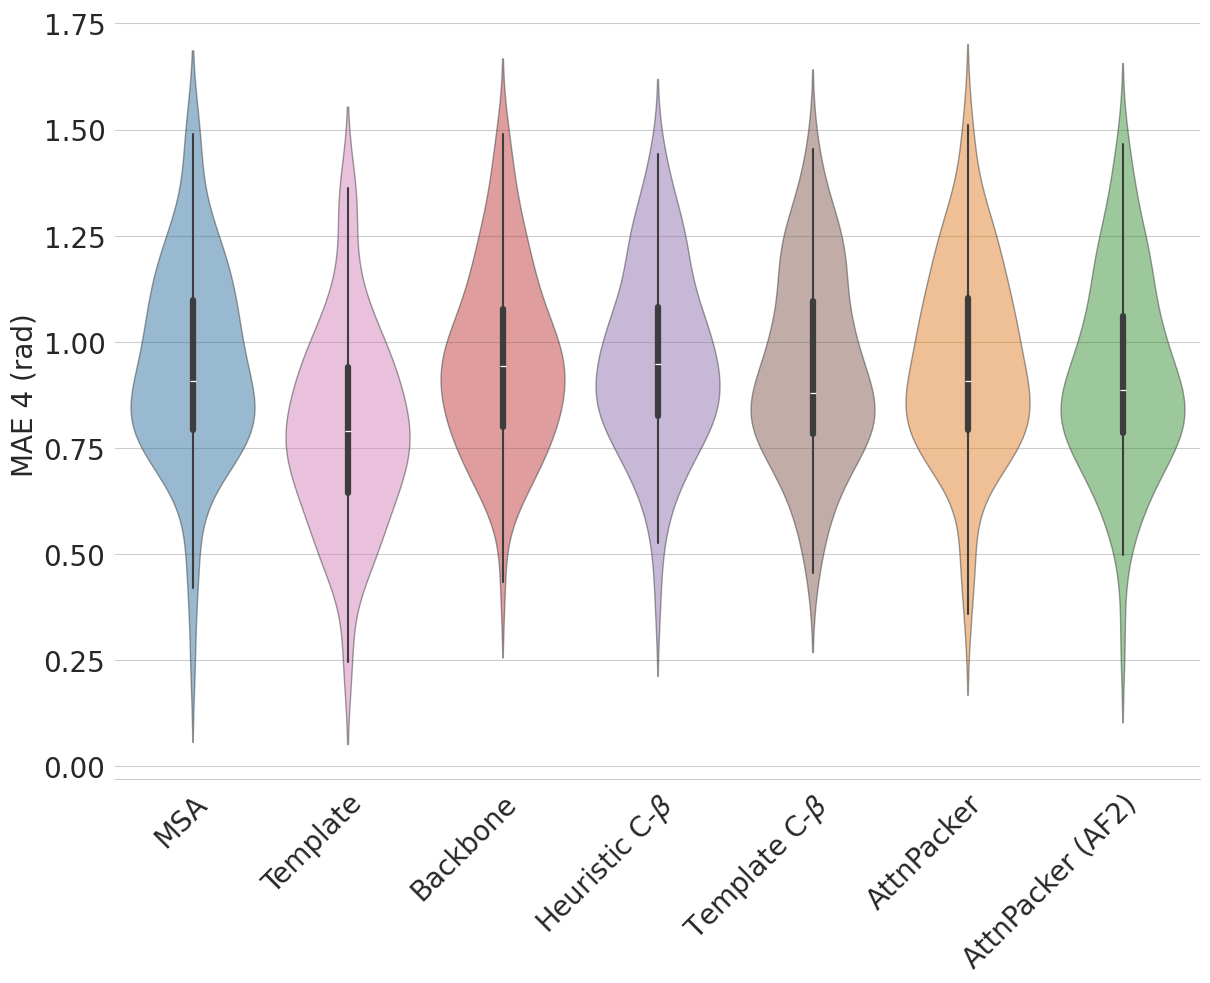

<Figure size 640x480 with 0 Axes>

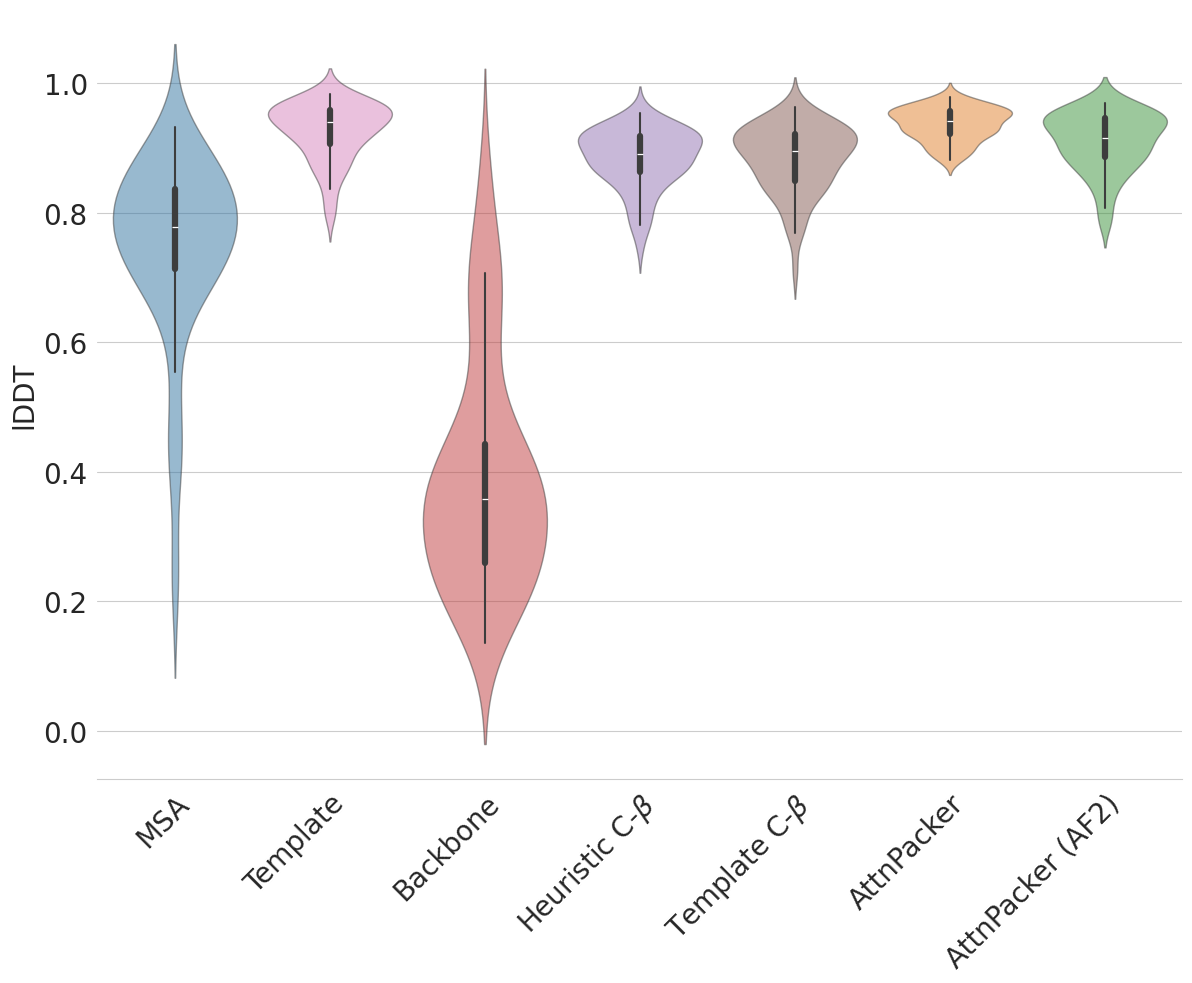

<Figure size 640x480 with 0 Axes>

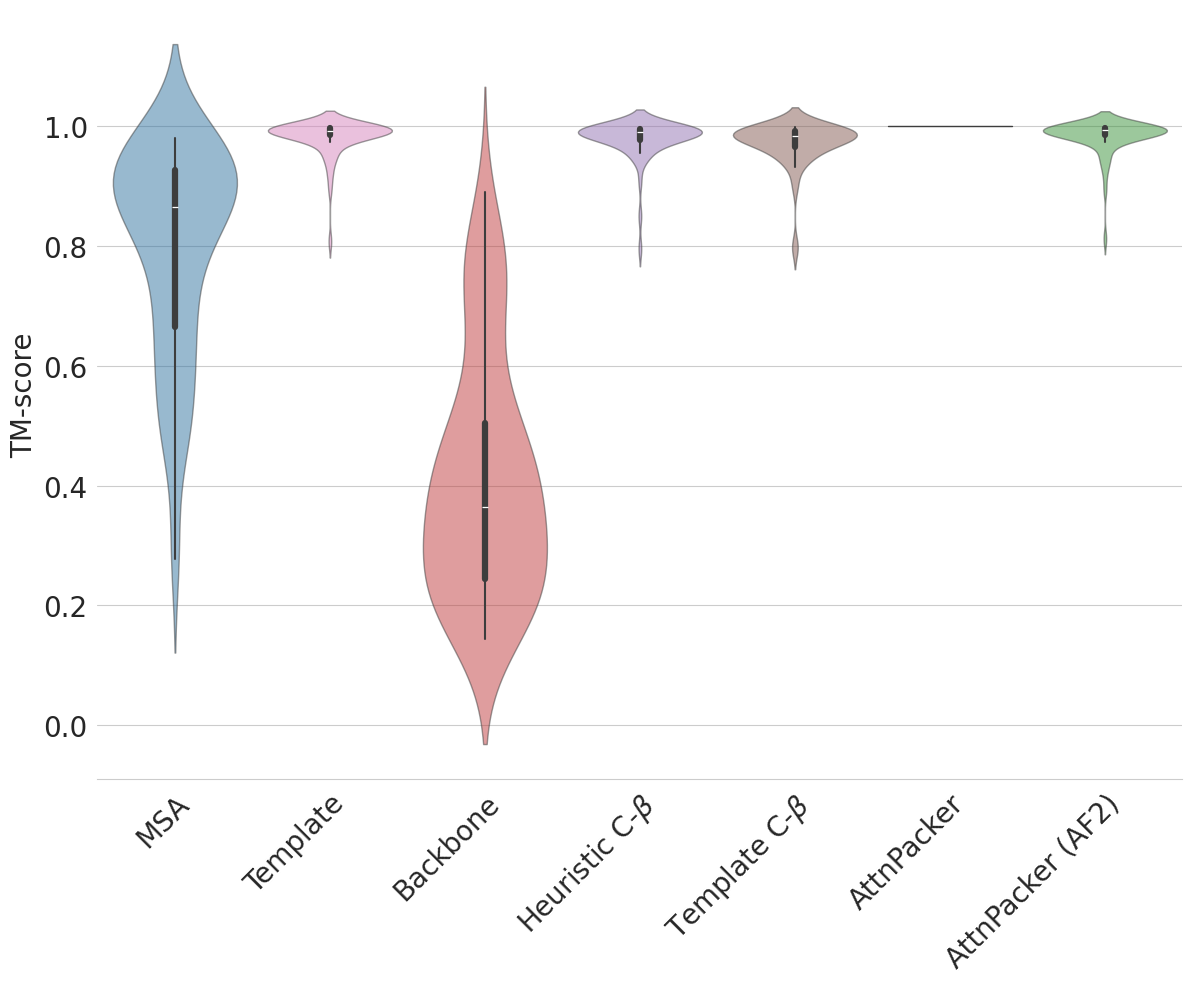

<Figure size 640x480 with 0 Axes>

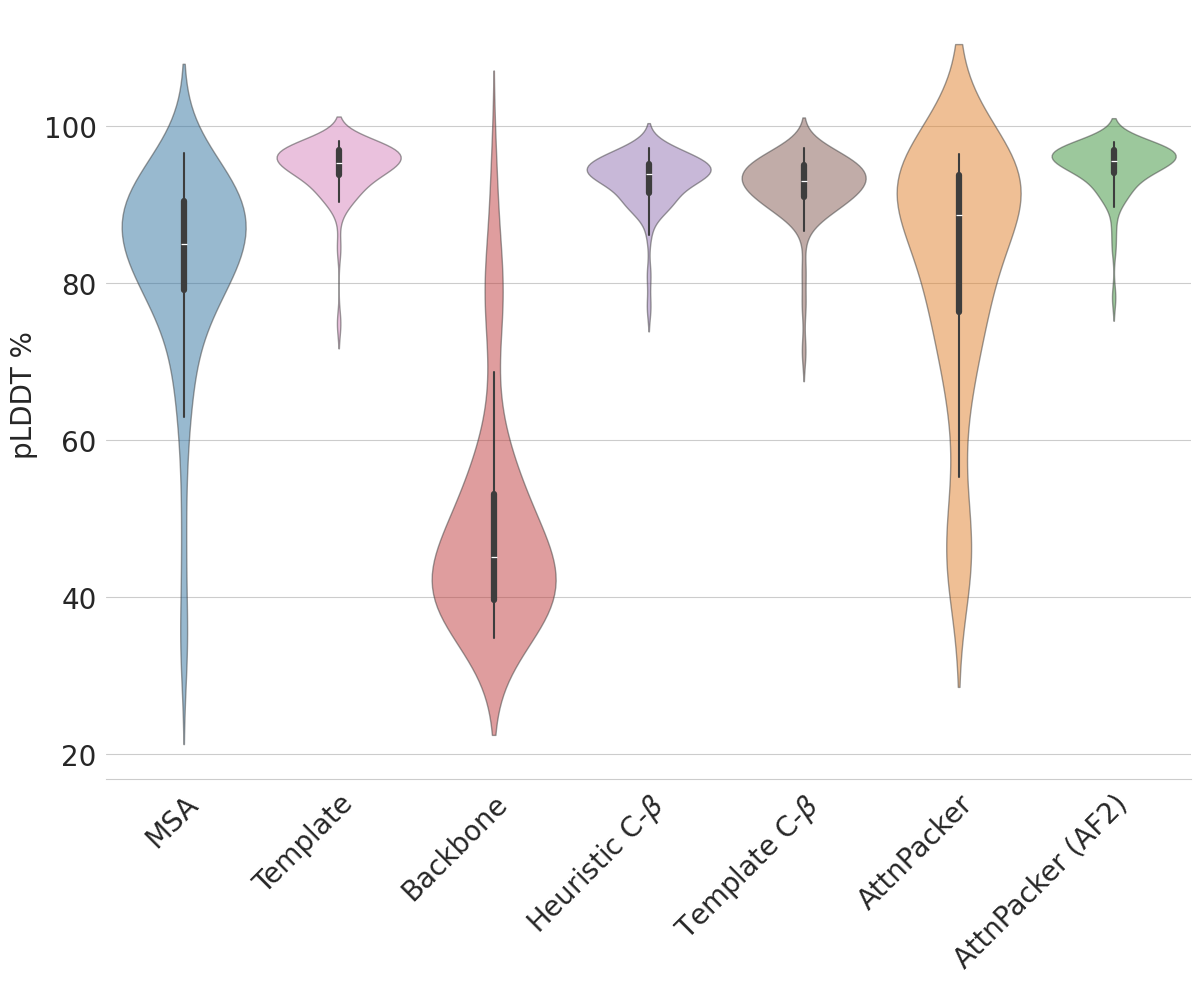

<Figure size 640x480 with 0 Axes>

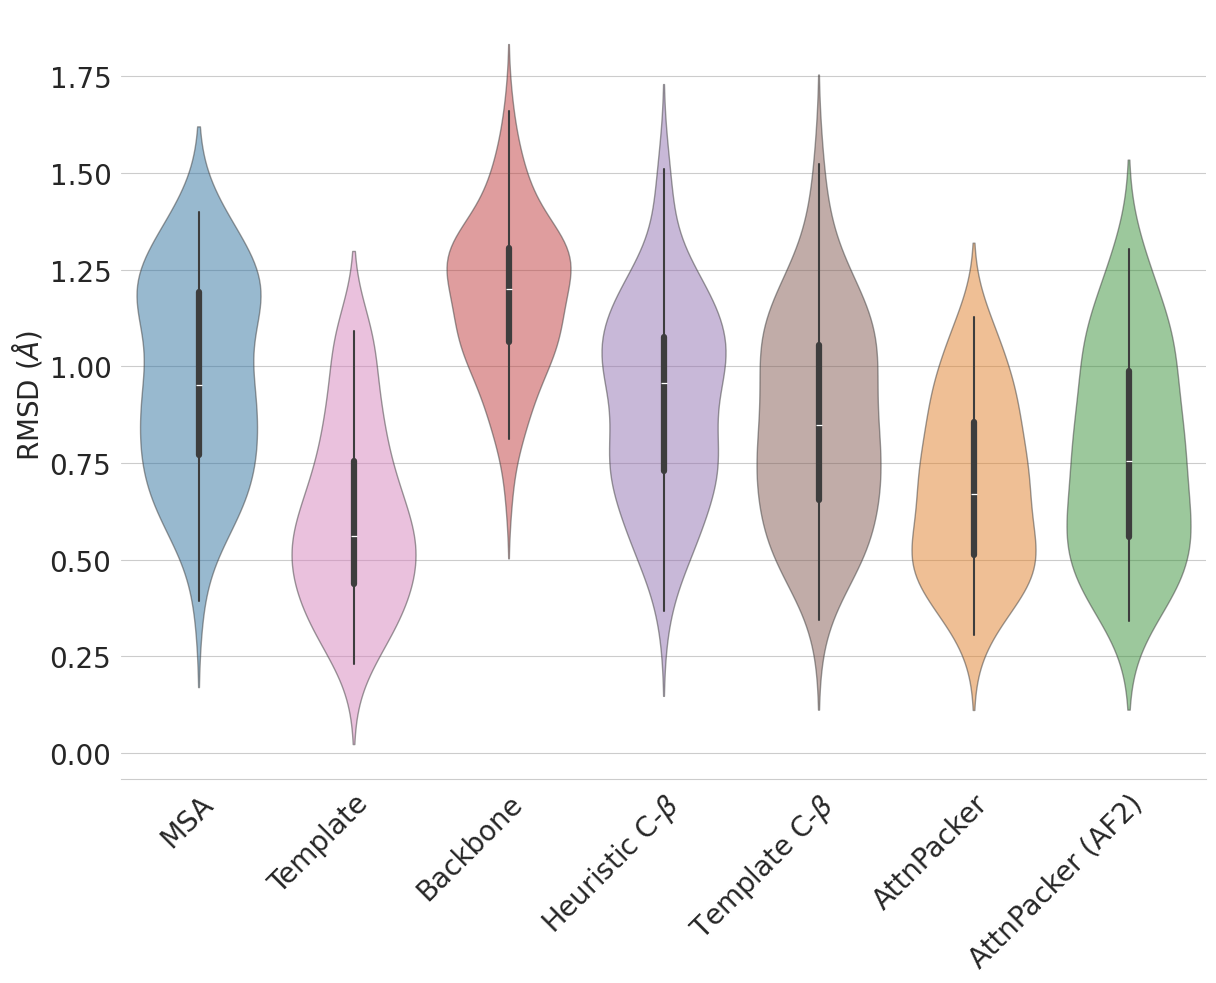

<Figure size 640x480 with 0 Axes>

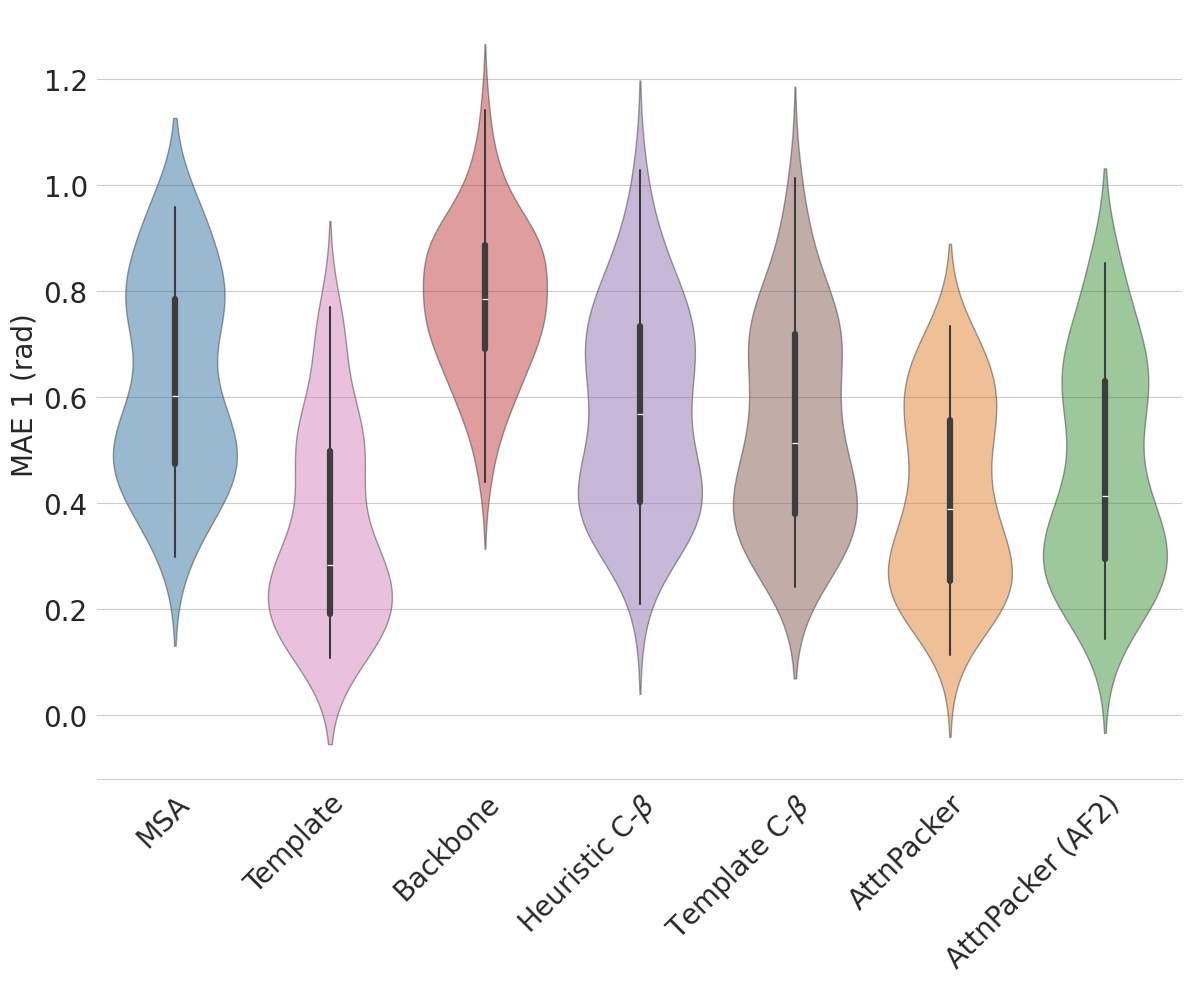

<Figure size 640x480 with 0 Axes>

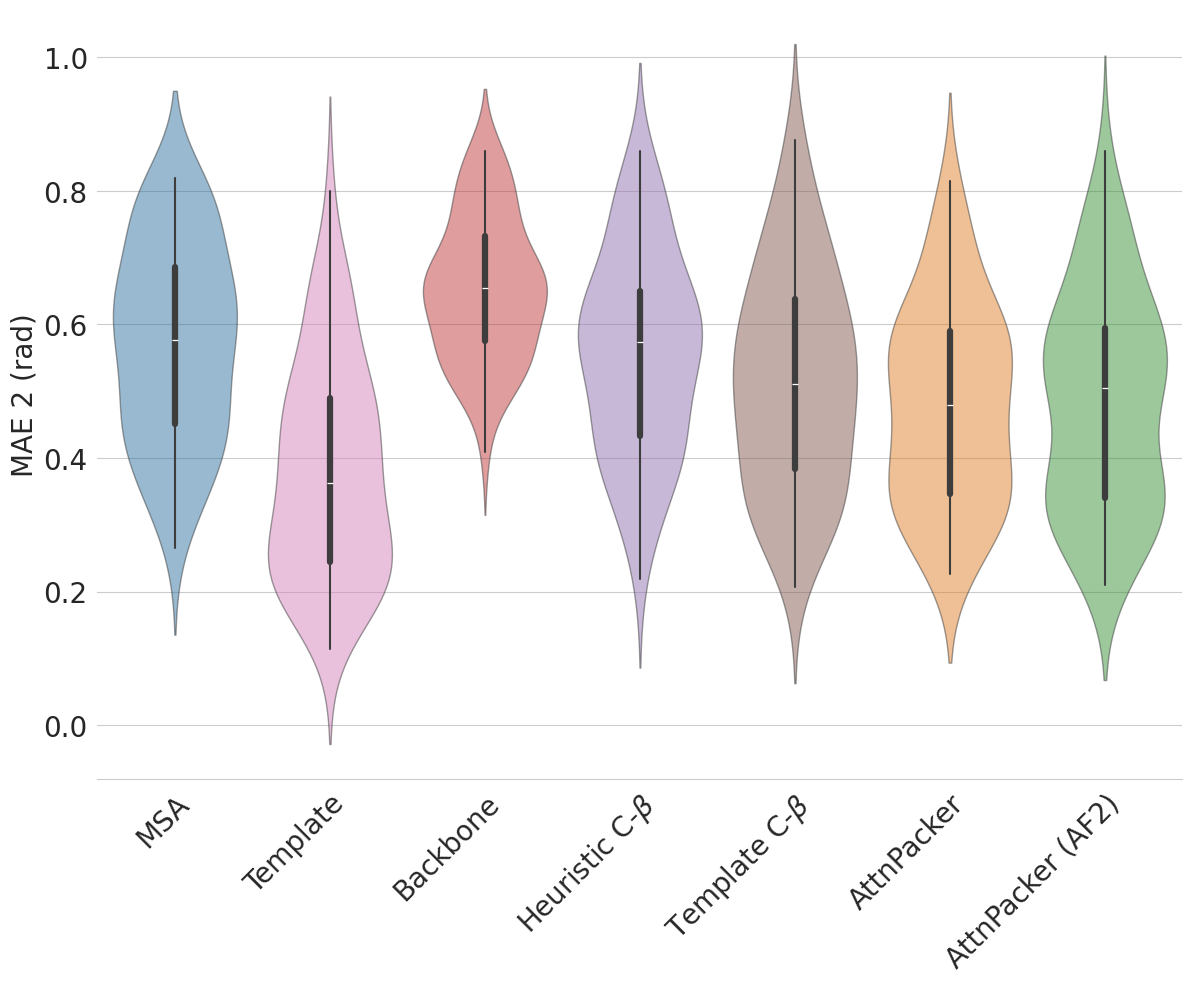

<Figure size 640x480 with 0 Axes>

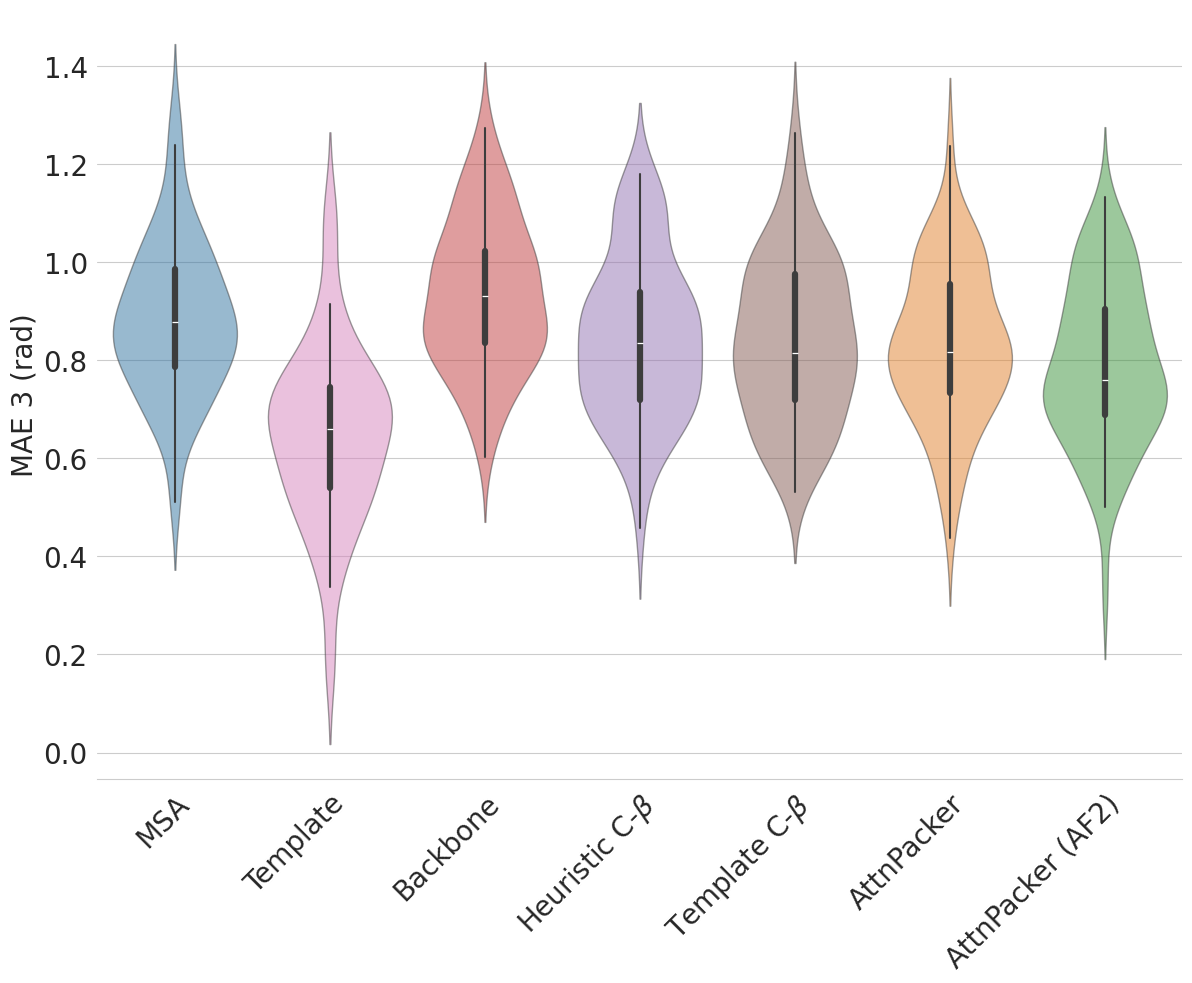

<Figure size 640x480 with 0 Axes>

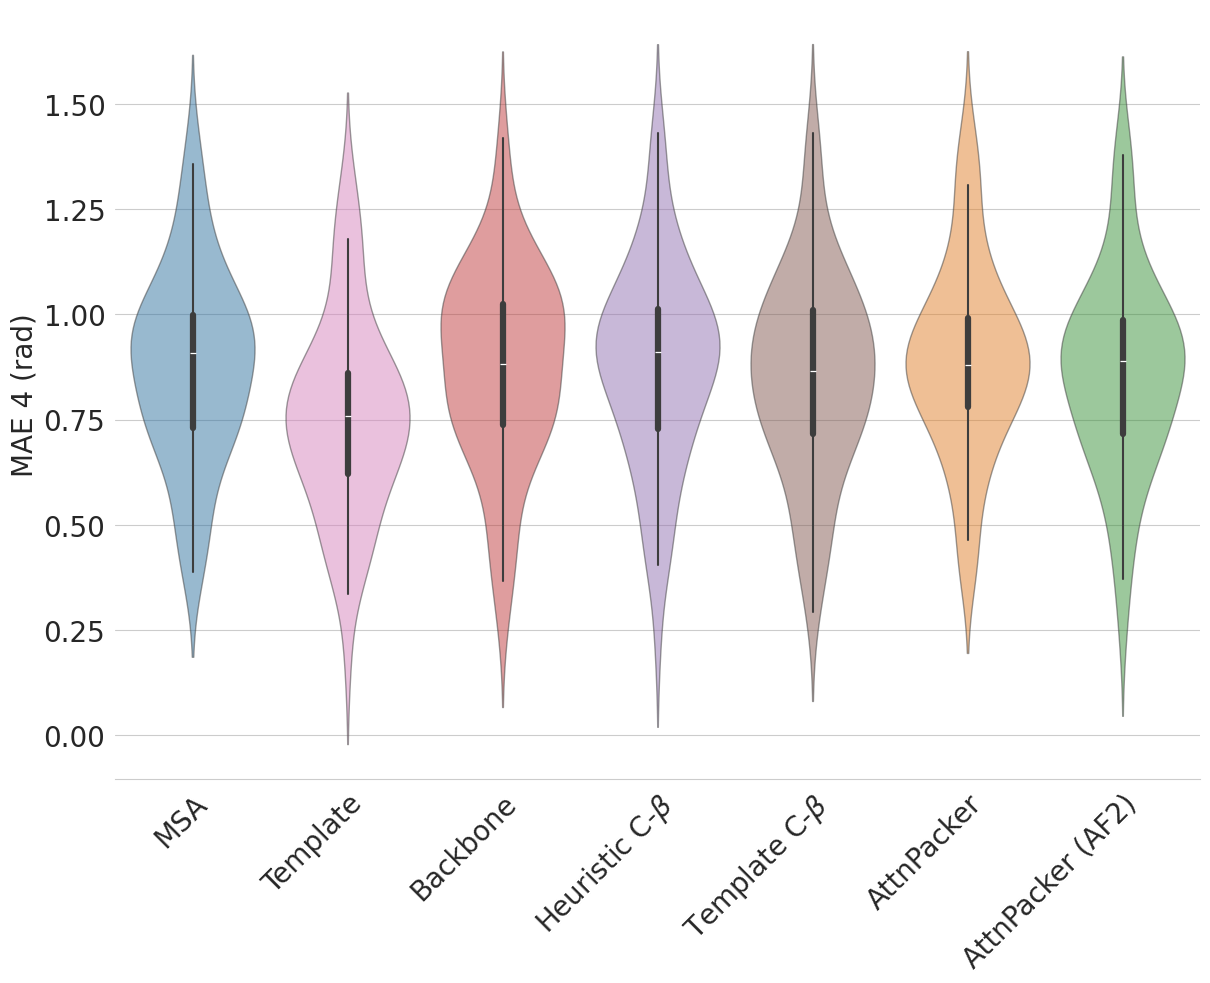

<Figure size 640x480 with 0 Axes>

In [9]:
for dataset in ["CASP13", "CASP14"]:
    for metric in metrics:
        plt.figure(figsize=(14, 10))
        ax = sns.violinplot(
            grp[(grp["Dataset"] == dataset) & (grp["Method"].isin(order))],
            x="Method",
            hue="Method",
            y=metric,
            linewidth=1,
            palette="tab10",
            order=order,
        )
        plt.setp(ax.collections, alpha=0.5)
        sns.despine(left=True)
        plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
        plt.xlabel(None)
        plt.savefig(
            f"figures/packing_violin_{dataset}_{metric}.png",
            bbox_inches="tight",
            dpi=560,
            transparent=False,
        )
        plt.savefig(
            f"figures/packing_violin_{dataset}_{metric}.svg",
            bbox_inches="tight",
            transparent=True,
        )
        plt.show()
        plt.clf()